<a href="https://colab.research.google.com/github/anushkasingh2002/ML-Assignments/blob/main/ML_Assign_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_excel("/content/Data-RF.xlsx")

In [ ]:
import numpy as np

In [ ]:
!pip install tensorflow_decision_forests
!pip install tf_keras

In [ ]:
import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math
import matplotlib as plt

In [ ]:
df.head()

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,High,C-
4,7.25,24,30.0,Male,High,C-


In [ ]:
df.describe()

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90)
count,500.000000,500.000000,500.000000
mean,9.647500,23.316000,41.309000
std,5.762946,2.539496,15.336801
min,-3.500000,0.000000,-2.000000
25%,5.250000,24.000000,32.000000
50%,9.500000,24.000000,43.000000
75%,13.562500,24.000000,52.000000
max,28.500000,24.000000,76.000000


# Visualising the Hypothesis space

>sns.pairplot(): Generates a pair plot using seaborn. The hue=target_column parameter colors the points based on the 'Grade' variable

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

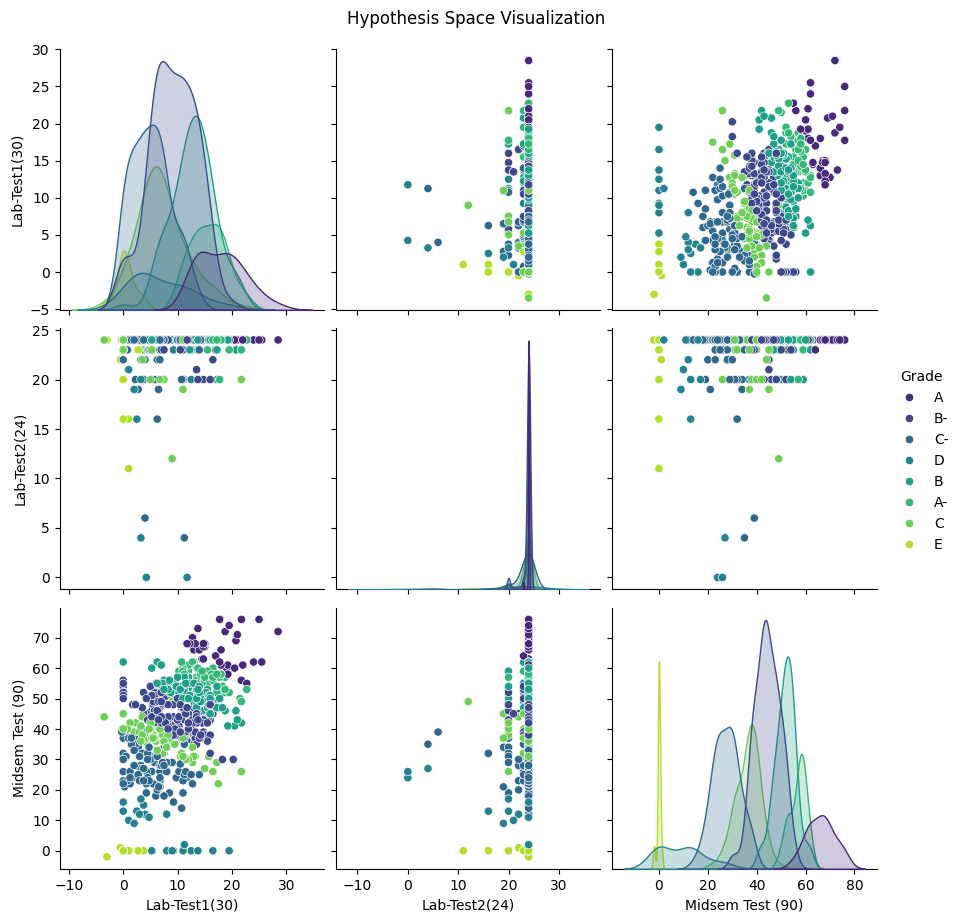

In [ ]:
features = ['Lab-Test1(30)', 'Lab-Test2(24)', 'Midsem Test (90)', 'Gender', 'Attendance']
target_column = 'Grade'
# Lab-Test1(30)	Lab-Test2(24)	Midsem Test (90)	Gender	Attendance	Grade
# Combine features and target variable into a single DataFrame
df_visualization = pd.concat([df[features], df[target_column]], axis=1)

# Create a pair plot
sns.pairplot(df_visualization, hue=target_column, markers='o', palette='viridis', height=3)
plt.suptitle("Hypothesis Space Visualization", y=1.02)
plt.show()

## Encoding grades
Encode the categorical labels as integers.

classification label is represented as a
string

We need to encode 'Grade' since Keras expects integer classification labels.

In [ ]:
# Name of the label column.
label = "Grade"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label] = df[label].map(classes.index)

Label classes: ['A', 'B-', 'C-', 'D', 'B', 'A-', 'C', 'E']


In [ ]:
df

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,0
1,15.00,24,67.0,Female,High,0
2,5.25,24,45.0,Male,High,1
3,2.75,19,34.0,Male,High,2
4,7.25,24,30.0,Male,High,2
...,...,...,...,...,...,...
495,10.50,24,48.0,Male,Low,1
496,11.00,24,31.0,Female,Moderate,6
497,11.75,24,47.0,Male,High,1
498,0.00,20,0.0,Female,Low,7


## Train Test Split

In [ ]:

def split_dataset(dataset, test_ratio=0.30):
    """Splits a pandas DataFrame into training and testing sets."""
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

# Assuming you have a pandas DataFrame named dataset_df
train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(len(train_ds_pd), len(test_ds_pd)))


357 examples in training, 143 examples for testing.


###  convert the pandas dataframe (pd.Dataframe) into tensorflow datasets (tf.data.Dataset):

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

# Training the model

In [ ]:

#set_cell_height 300

# Specify the model.
model_rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION, num_trees=30, verbose=2)

# Train the model.
model_rf.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmphhq5fe__ as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-11 20:08:35.2452 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-11 20:08:35.2453 UTC kernel.cc:772] Collect training examples
[INFO 24-02-11 20:08:35.2453 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-11 20:08:35.2457 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-11 20:08:35.2458 UTC kernel.cc:392] Number of examples: 357
[INFO 24-02-11 20:08:35.2458 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-11 20:08:35.2459 UTC kernel.cc:792] Tra

Model trained in 0:00:00.067963
Compiling model...
Model compiled.


#remarks

>No input features are specified. Therefore, all the columns will be used as input features except for the label. The feature used by the model are shown in the training logs and in the model.summary().


>DFs consume natively numerical, categorical, categorical-set features and missing-values. Numerical features do not need to be normalized. Categorical string values do not need to be encoded in a dictionary.


>No training hyper-parameters are specified. Therefore the default hyper-parameters will be used. Default hyper-parameters provide reasonable results in most situations.


>Tweak the verbose argument to RandomForestModel to control the amount of displayed training logs. Set verbose=0 to hide most of the logs. Set verbose=2 to show all the logs.


Note: A Categorical-Set feature is composed of a set of categorical values (while a Categorical is only one value). More details and examples are given later.

In [ ]:
model_rf.compile(metrics=["accuracy"])
evaluation = model_rf.evaluate(train_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 163ms/step - loss: 0.0000e+00 - accuracy: 0.9440

loss: 0.0000
accuracy: 0.9440


In [ ]:
#evaluating accuracy on test dataset

model_rf.compile(metrics=["accuracy"])
evaluation = model_rf.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 161ms/step - loss: 0.0000e+00 - accuracy: 0.7972

loss: 0.0000
accuracy: 0.7972


## **Accuracy on test dataset :  %**

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_rf, tree_idx=0, max_depth=3)

In [ ]:
model_rf.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Attendance
	Gender
	Lab-Test1(30)
	Lab-Test2(24)
	Midsem_Test_(90)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "Midsem_Test_(90)"  0.909091 ################
    2.    "Lab-Test1(30)"  0.332302 ###
    3.    "Lab-Test2(24)"  0.164283 
    4.       "Attendance"  0.159128 
    5.           "Gender"  0.158618 

Variable Importance: NUM_AS_ROOT:
    1. "Midsem_Test_(90)" 27.000000 ################
    2.    "Lab-Test1(30)"  3.000000 

Variable Importance: NUM_NODES:
    1. "Midsem_Test_(90)" 434.000000 ################
    2.    "Lab-Test1(30)" 408.000000 ###############
   

In [ ]:
model_rf.make_inspector().features()

["Attendance" (4; #0),
 "Gender" (4; #1),
 "Lab-Test1(30)" (1; #2),
 "Lab-Test2(24)" (1; #3),
 "Midsem_Test_(90)" (1; #4)]

In [ ]:
model_rf.make_inspector().variable_importances()

{'SUM_SCORE': [("Midsem_Test_(90)" (1; #4), 13006.389116682578),
  ("Lab-Test1(30)" (1; #2), 4904.995306055993),
  ("Lab-Test2(24)" (1; #3), 246.24310056865215),
  ("Attendance" (4; #0), 32.447623919695616),
  ("Gender" (4; #1), 24.815307699143887)],
 'NUM_NODES': [("Midsem_Test_(90)" (1; #4), 434.0),
  ("Lab-Test1(30)" (1; #2), 408.0),
  ("Lab-Test2(24)" (1; #3), 42.0),
  ("Gender" (4; #1), 12.0),
  ("Attendance" (4; #0), 9.0)],
 'NUM_AS_ROOT': [("Midsem_Test_(90)" (1; #4), 27.0),
  ("Lab-Test1(30)" (1; #2), 3.0)],
 'INV_MEAN_MIN_DEPTH': [("Midsem_Test_(90)" (1; #4), 0.9090909090909091),
  ("Lab-Test1(30)" (1; #2), 0.3323019270541091),
  ("Lab-Test2(24)" (1; #3), 0.16428340210642411),
  ("Attendance" (4; #0), 0.15912828055299458),
  ("Gender" (4; #1), 0.1586176775635481)]}

In [ ]:
model_rf.make_inspector().evaluation()

Evaluation(num_examples=357, accuracy=0.803921568627451, loss=0.9327718270342557, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
model_rf.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=139, accuracy=0.7985611510791367, loss=7.260591685343131, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=355, accuracy=0.7859154929577464, loss=2.6938018713618668, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=357, accuracy=0.8067226890756303, loss=1.5176937640005468, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=30, evaluation=Evaluation(num_examples=357, accuracy=0.803921568627451, loss=0.9327718270342557, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None))]

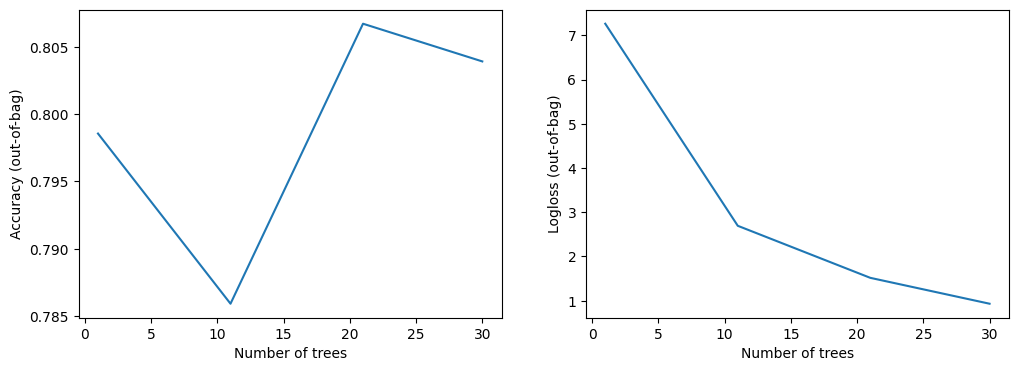

In [ ]:
import matplotlib.pyplot as plt

logs = model_rf.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

# GBDT
implementing gradient boosted decision tree

In [ ]:
model_gbdt = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.CLASSIFICATION, num_trees=30, verbose=0)
model_gbdt.fit(train_ds)

## Train test split for GBDT

In [ ]:
def split_dataset(dataset, test_ratio=0.30):
    """Splits a pandas DataFrame into training and testing sets."""
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

# Assuming you have a pandas DataFrame named dataset_df
train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(len(train_ds_pd), len(test_ds_pd)))


train_ds_gbdt = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds_gbdt = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

353 examples in training, 147 examples for testing.


In [ ]:
model_gbdt.compile(metrics=["accuracy"])
evaluation = model_gbdt.evaluate(train_ds_gbdt, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 171ms/step - loss: 0.0000e+00 - accuracy: 0.9462

loss: 0.0000
accuracy: 0.9462


In [ ]:
model_gbdt.compile(metrics=["accuracy"])
evaluation = model_rf.evaluate(test_ds_gbdt, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 105ms/step - loss: 0.0000e+00 - accuracy: 0.8980

loss: 0.0000
accuracy: 0.8980


In [ ]:
model_gbdt.make_inspector().features()

["Attendance" (4; #0),
 "Gender" (4; #1),
 "Lab-Test1(30)" (1; #2),
 "Lab-Test2(24)" (1; #3),
 "Midsem_Test_(90)" (1; #4)]

In [ ]:
model_rf.make_inspector().evaluation()

Evaluation(num_examples=357, accuracy=0.803921568627451, loss=0.9327718270342557, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

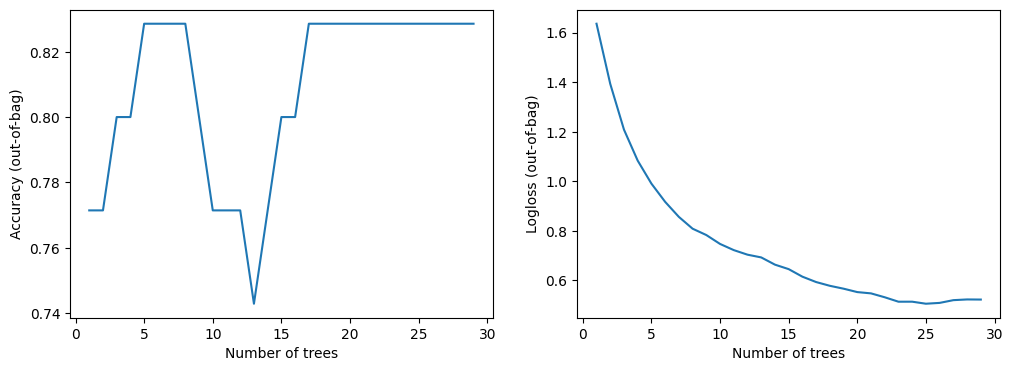

In [ ]:
import matplotlib.pyplot as plt

logs = model_gbdt.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

## Tuning Hyper parameter n_trees to tweak accuracy




>Use nested loops for hyperparameter tuning to iterate over different combinations efficiently.

>Monitor both training and testing accuracies to identify overfitting or underfitting.


1/1 [==============================] - 0s 170ms/step - loss: 0.0000e+00 - accuracy: 0.8322


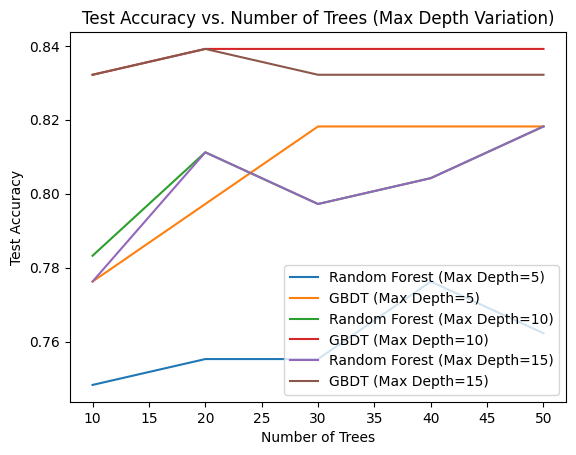

In [ ]:
# Define range of values for max_depth and n_trees
max_depth_values = [5, 10, 15]  # Example values for max_depth
n_trees_values = [10, 20, 30, 40, 50]  # Example values for n_trees

# Lists to store results
rf_test_accuracies = []
gbdt_test_accuracies = []

# Loop over max_depth values
for max_depth in max_depth_values:
    rf_accuracies = []
    gbdt_accuracies = []

    # Loop over n_trees values
    for n_trees in n_trees_values:
        # Train Random Forest model
        model_rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION, num_trees=n_trees, max_depth=max_depth, verbose=0)
        model_rf.fit(train_ds)

        # Evaluate on test dataset
        model_rf.compile(metrics=["accuracy"])
        evaluation_rf = model_rf.evaluate(test_ds, return_dict=True)
        rf_accuracies.append(evaluation_rf.get('accuracy', None))

        # Train GBDT model
        model_gbdt = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.CLASSIFICATION, num_trees=n_trees, max_depth=max_depth, verbose=0)
        model_gbdt.fit(train_ds)

        # Evaluate on test dataset
        model_gbdt.compile(metrics=["accuracy"])
        evaluation_gbdt = model_gbdt.evaluate(test_ds, return_dict=True)
        gbdt_accuracies.append(evaluation_gbdt.get('accuracy', None))

    # Append results for this max_depth to the main lists
    rf_test_accuracies.append(rf_accuracies)
    gbdt_test_accuracies.append(gbdt_accuracies)

# Plotting the results
for i, max_depth in enumerate(max_depth_values):
    plt.plot(n_trees_values, rf_test_accuracies[i], label=f'Random Forest (Max Depth={max_depth})')
    plt.plot(n_trees_values, gbdt_test_accuracies[i], label=f'GBDT (Max Depth={max_depth})')

plt.xlabel('Number of Trees')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Trees (Max Depth Variation)')
plt.legend()
plt.show()


# Conclusion

Increasing the n_trees and max depth hyperparameter increases the accuracy for both Random forest and GDBT. For a resonable accuracy, we can take max depth as 10 for GDBT to get an accuracy close to 85%.